<a href="https://colab.research.google.com/github/benAJoseph/SleepPoseYolo/blob/main/Sleep_posture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install roboflow
!mkdir {HOME}/datasets
%cd {HOME}/datasets

from google.colab import userdata
from roboflow import Roboflow

rf = Roboflow(api_key="N2IDU13hsYNiH3FaRIg2")
project = rf.workspace("sam-vcqdz").project("object-detection-ikxzz")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 67.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
mkdir: cannot create directory ‘{HOME}/datasets’: No such file or directory
[Errno 2] No such file or directory: '{HOME}/datasets'
/content
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Object-Detection-1 in yolov11:: 100%|██████████| 9040/9040 [00:01<00:00, 5529.55it/s]


In [ ]:
%pip install "ultralytics<=8.3.40" supervision roboflow
# prevent ultralytics from tracking your activity
!yolo settings sync=False
import ultralytics
ultralytics.checks()

Ultralytics 8.3.40 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 39.5/112.6 GB disk)


In [ ]:
!yolo task=detect mode=train model=yolo11s.pt data=/content/Object-Detection-1/data.yaml epochs=10 imgsz=640 plots=True

100% 18.4M/18.4M [00:00<00:00, 65.6MB/s]
New https://pypi.org/project/ultralytics/8.3.189 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11s.pt, data=/content/Object-Detection-1/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, ret

In [ ]:
# Continue training from best.pt
!yolo task=detect mode=train model=runs/detect/train/weights/best.pt data=/content/Object-Detection-1/data.yaml epochs=100 imgsz=640 plots=True

New https://pypi.org/project/ultralytics/8.3.189 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.40 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=runs/detect/train/weights/best.pt, data=/content/Object-Detection-1/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

In [ ]:
!zip -r /content/sleepRUN.zip /content/runs

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/train/ (stored 0%)
  adding: content/runs/detect/train/PR_curve.png (deflated 10%)
  adding: content/runs/detect/train/labels_correlogram.jpg (deflated 35%)
  adding: content/runs/detect/train/val_batch2_labels.jpg (deflated 6%)
  adding: content/runs/detect/train/weights/ (stored 0%)
  adding: content/runs/detect/train/weights/best.pt (deflated 8%)
  adding: content/runs/detect/train/weights/last.pt (deflated 8%)
  adding: content/runs/detect/train/labels.jpg (deflated 18%)
  adding: content/runs/detect/train/R_curve.png (deflated 9%)
  adding: content/runs/detect/train/train_batch0.jpg (deflated 5%)
  adding: content/runs/detect/train/val_batch0_pred.jpg (deflated 9%)
  adding: content/runs/detect/train/F1_curve.png (deflated 9%)
  adding: content/runs/detect/train/confusion_matrix_normalized.png (deflated 24%)
  adding: content/runs/detect/train/results.csv (deflated 56%)
  a

In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="N2IDU13hsYNiH3FaRIg2")
project = rf.workspace("thesis-dx8vu").project("sleepig-position")
version = project.version(2)
dataset = version.download("yolov11")

# Run validation (gives stats like mAP, precision, recall)
!yolo task=detect mode=val model=runs/detect/train2/weights/best.pt data=/content/sleepig-position-2/data.yaml imgsz=640

loading Roboflow workspace...
loading Roboflow project...
Ultralytics 8.3.40 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs
val: Scanning /content/sleepig-position-2/valid/labels.cache... 42 images, 0 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 3, len(boxes) = 42. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  2.11it/s]
                   all         42         42      0.467          1      0.488      0.373
                 Prone          1          1     0.0233          1     0.0231     0.0162
                Supine         41         41      0.911          1      0.95

In [ ]:
# Run inference on validation images
!yolo task=detect mode=predict model=runs/detect/train2/weights/best.pt source=/content/sleepig-position-2/valid/images save=True

Ultralytics 8.3.40 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11s summary (fused): 238 layers, 9,414,348 parameters, 0 gradients, 21.3 GFLOPs

image 1/42 /content/sleepig-position-2/valid/images/IMG20250116195654_01_jpg.rf.00c4ac7ebf8a6c15133d9e72dc3c3531.jpg: 640x640 1 Prone, 1 To-Right, 15.5ms
image 2/42 /content/sleepig-position-2/valid/images/IMG20250116195655_jpg.rf.59e1c4a51f06f3585cbd5260506a5b7b.jpg: 640x640 1 Prone, 15.6ms
image 3/42 /content/sleepig-position-2/valid/images/IMG20250116195656_jpg.rf.33e743b716d444ec4a12678930556406.jpg: 640x640 1 Prone, 1 To-Right, 15.5ms
image 4/42 /content/sleepig-position-2/valid/images/IMG20250116195657_01_jpg.rf.cdf7045bdfad854fef8ea227b6025099.jpg: 640x640 1 Prone, 1 To-Right, 15.5ms
image 5/42 /content/sleepig-position-2/valid/images/IMG20250116195657_jpg.rf.1f2ef19a3093dc9946cc34de0364b8b3.jpg: 640x640 1 Prone, 1 Supine, 15.5ms
image 6/42 /content/sleepig-position-2/valid/images/IMG20250116195658_jpg.rf.06a9c7fb4

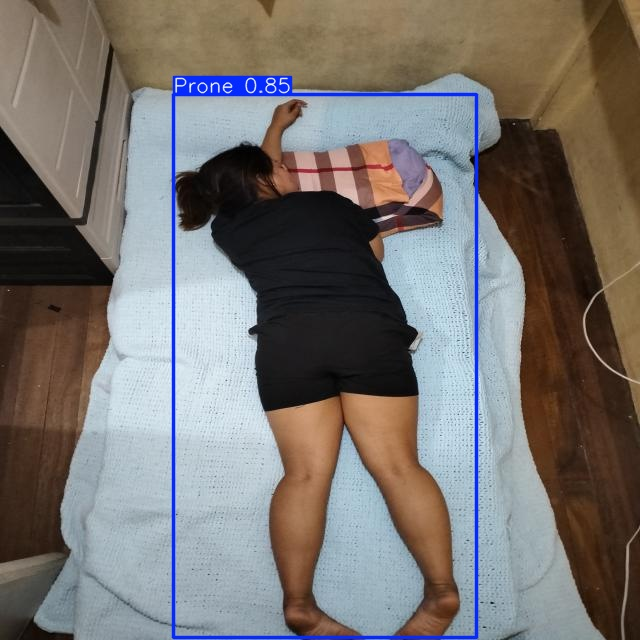

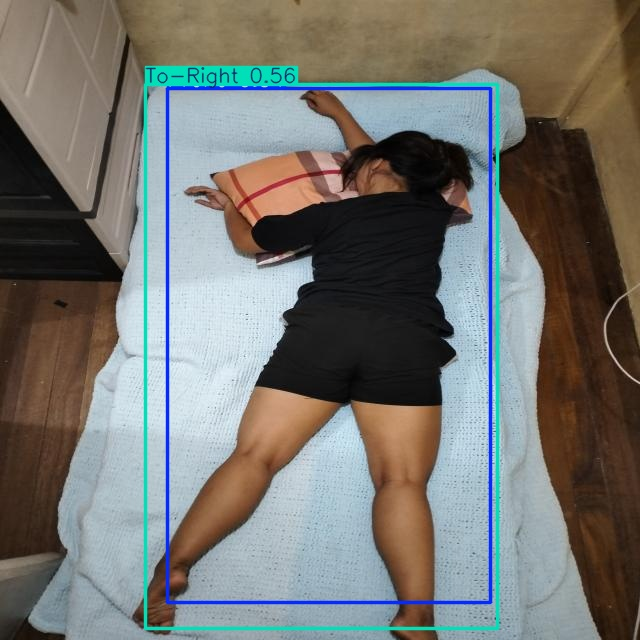

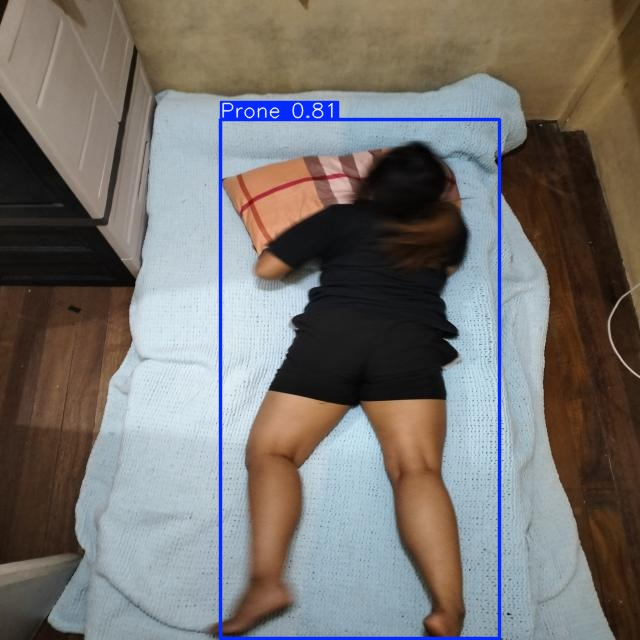

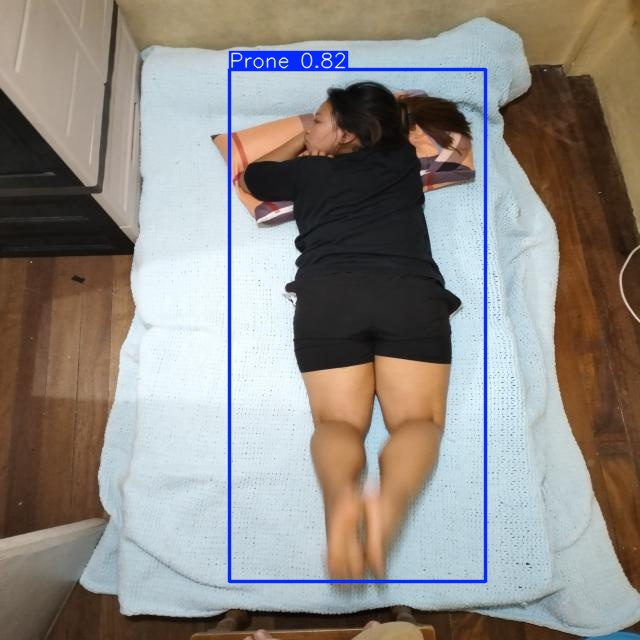

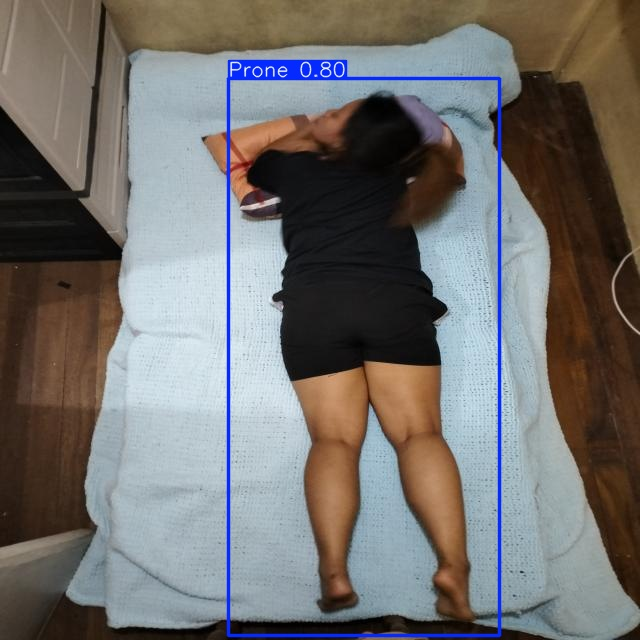

In [ ]:
# Display predictions
import glob
from IPython.display import Image, display

pred_images = glob.glob("runs/detect/predict/*.jpg")
for img_path in pred_images[:5]:
    display(Image(filename=img_path))